In [1]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#we can clearly see that there are no null values.so we can continue with the data

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


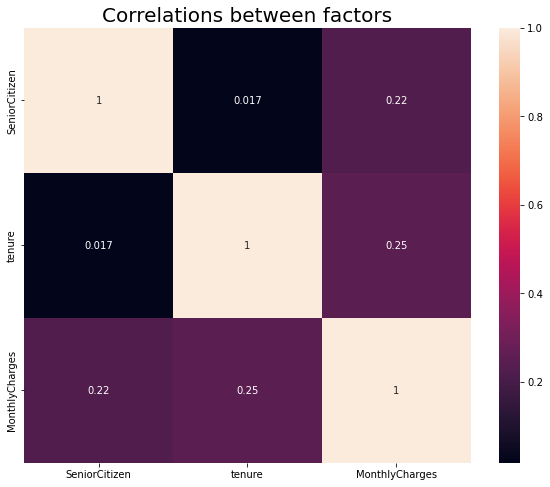

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [12]:
#NOW we check for skewness in data

df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [13]:
#using label encoder for categorical target (churn) for encoding 
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [14]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [15]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1


In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

0    5174
1    1869
Name: Churn, dtype: int64

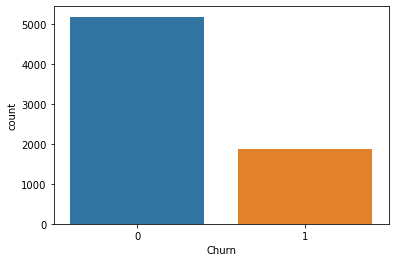

In [17]:
#now we see the count of loan status
sns.countplot(df['Churn'])
df['Churn'].value_counts()

In [18]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [19]:
#their is a imbalance in the dataset,so we will deal with it later

In [20]:
correlations = df.corr()['Churn'].sort_values(ascending=False)
print(correlations)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


<AxesSubplot:>

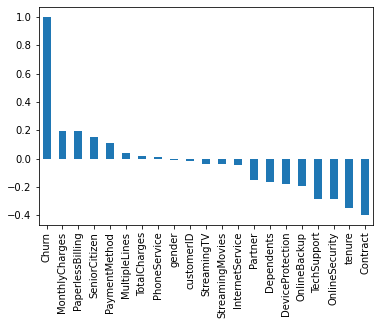

In [21]:
#the attributes share positive as well as negaative correlation with the target

correlations.plot(kind='bar')

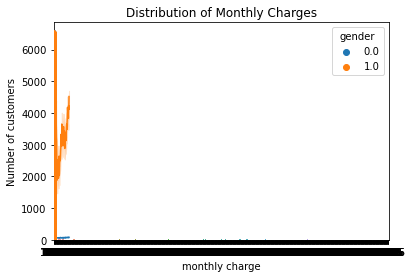

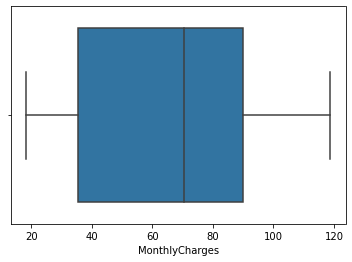

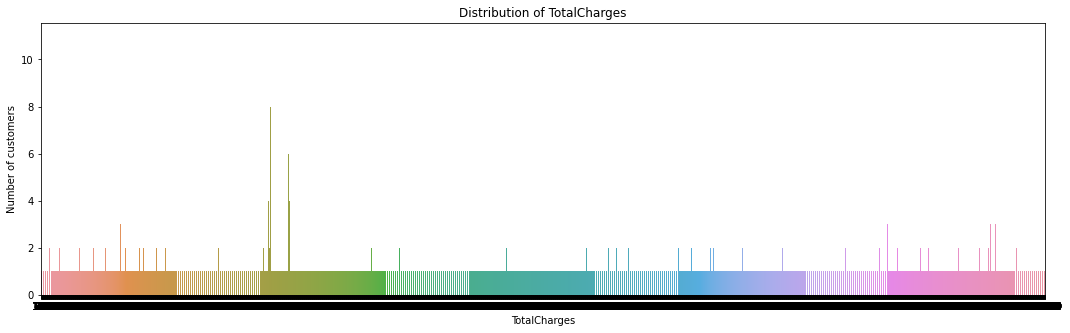

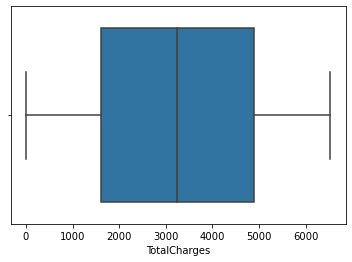

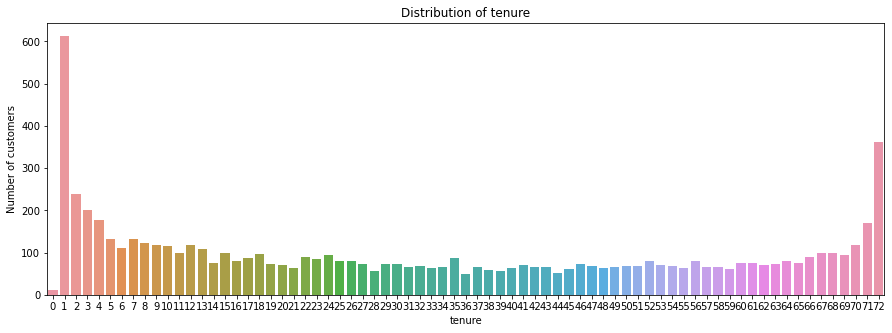

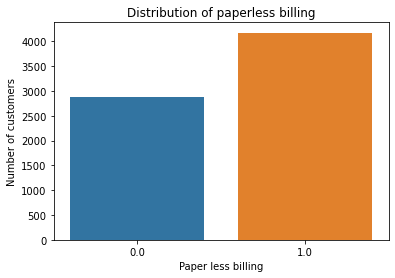

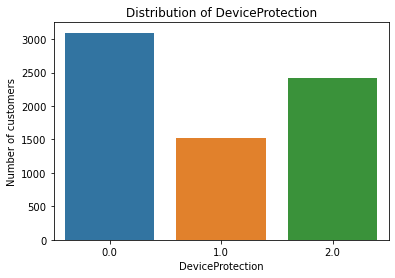

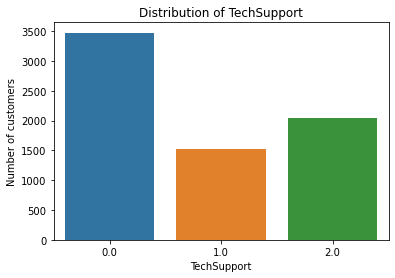

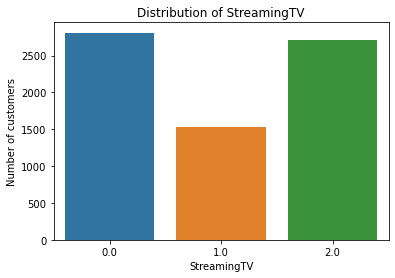

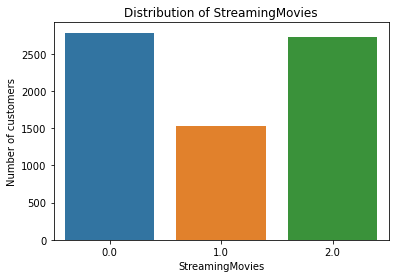

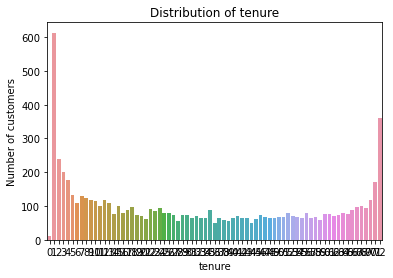

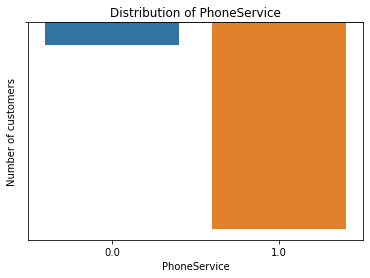

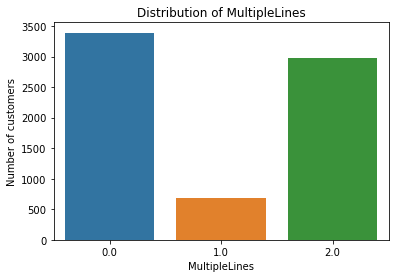

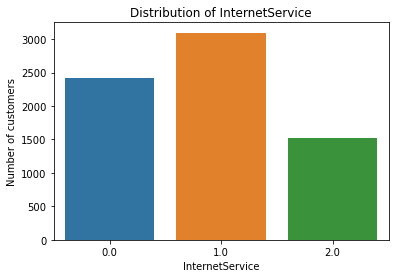

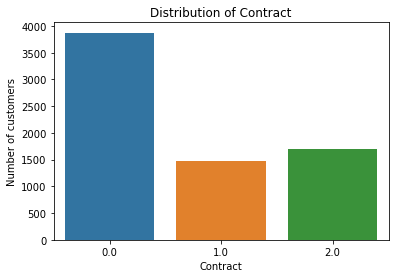

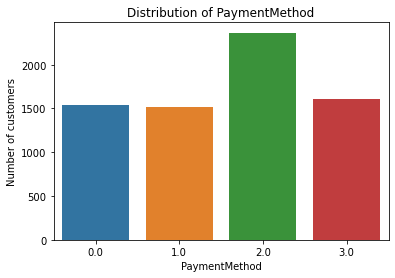

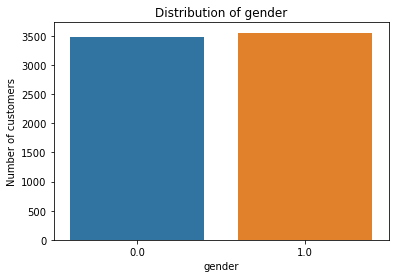

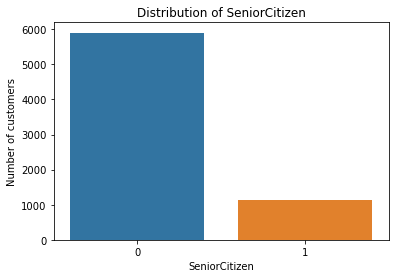

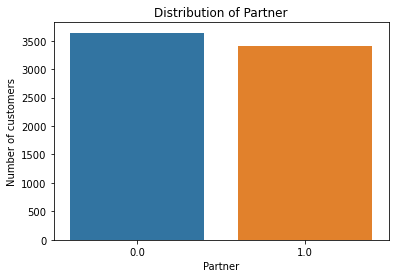

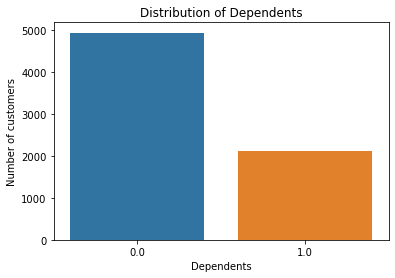

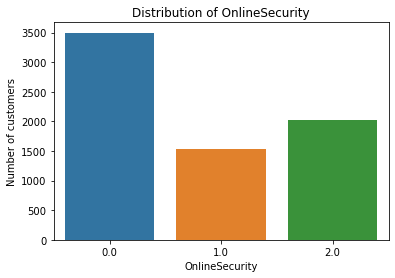

In [22]:
sns.stripplot(x='Churn',y='MonthlyCharges', data=df)
sns.stripplot(x='Churn',y='TotalCharges', data=df)
sns.stripplot(x='Churn',y='tenure', data=df)
sns.lineplot(y='MonthlyCharges',x='tenure', data=df)
sns.lineplot(y='TotalCharges',x='tenure', data=df)
sns.scatterplot(x="Churn", y="MonthlyCharges", hue="gender", data=df)


sns.countplot(df['MonthlyCharges'])
plt.title('Distribution of Monthly Charges')
plt.xlabel('monthly charge')
plt.ylabel('Number of customers')
plt.show()

sns.boxplot(df['MonthlyCharges'])

plt.figure(figsize=(18, 5))
sns.countplot(df['TotalCharges'])
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Number of customers')
plt.show()

sns.boxplot(df['TotalCharges'])

plt.figure(figsize=(15, 5))
sns.countplot(df['tenure'])
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['PaperlessBilling'])
plt.title('Distribution of paperless billing')
plt.xlabel('Paper less billing')
plt.ylabel('Number of customers')
plt.show()

sns.countplot(df['DeviceProtection'])
plt.title('Distribution of DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['TechSupport'])
plt.title('Distribution of TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['StreamingTV'])
plt.title('Distribution of StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['StreamingMovies'])
plt.title('Distribution of StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['tenure'])
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.show()

sns.boxplot(df['tenure'])

sns.countplot(df['PhoneService'])
plt.title('Distribution of PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['MultipleLines'])
plt.title('Distribution of MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Number of customers')
plt.show()



sns.countplot(df['InternetService'])
plt.title('Distribution of InternetService')
plt.xlabel('InternetService')
plt.ylabel('Number of customers')
plt.show()



sns.countplot(df['Contract'])
plt.title('Distribution of Contract')
plt.xlabel('Contract')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['PaymentMethod'])
plt.title('Distribution of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['gender'])
plt.title('Distribution of gender')
plt.xlabel('gender')
plt.ylabel('Number of customers')
plt.show()



sns.countplot(df['SeniorCitizen'])
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['Partner'])
plt.title('Distribution of Partner')
plt.xlabel('Partner')
plt.ylabel('Number of customers')
plt.show()


sns.countplot(df['Dependents'])
plt.title('Distribution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of customers')
plt.show()



sns.countplot(df['OnlineSecurity'])
plt.title('Distribution of OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Number of customers')
plt.show()



<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

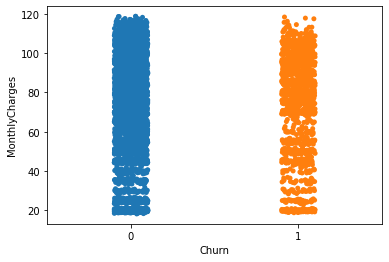

In [23]:
sns.stripplot(x='Churn',y='MonthlyCharges', data=df)

In [24]:
#monthly charges does not affect churn rate

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

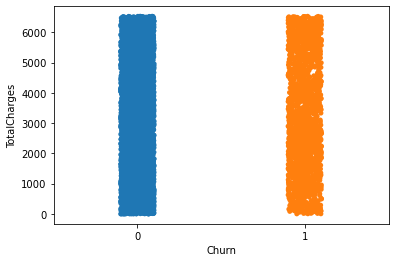

In [25]:
sns.stripplot(x='Churn',y='TotalCharges', data=df)

In [26]:
#total charges are same for churn value 0 or 1

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

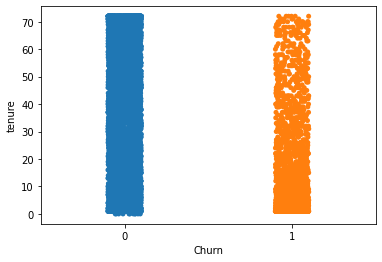

In [27]:
sns.stripplot(x='Churn',y='tenure', data=df)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

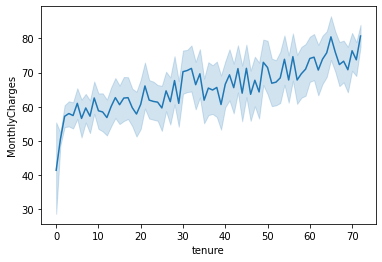

In [28]:
sns.lineplot(y='MonthlyCharges',x='tenure', data=df)

In [29]:
#tenure and monthly charges are linearly correlated

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

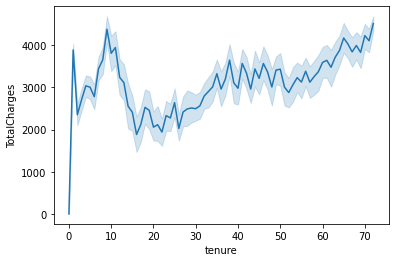

In [30]:
sns.lineplot(y='TotalCharges',x='tenure', data=df)

In [31]:
#TOTal charges are almost same for long tenure period,so churn is low  when the tenure is for long period

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

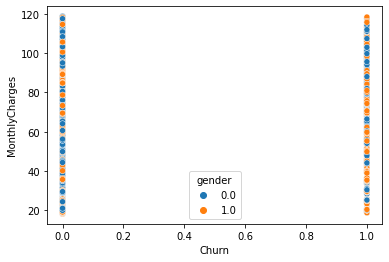

In [32]:
sns.scatterplot(x="Churn", y="MonthlyCharges", hue="gender", data=df)

In [33]:
#all gendder pay same monthly charges and churn rate is also same

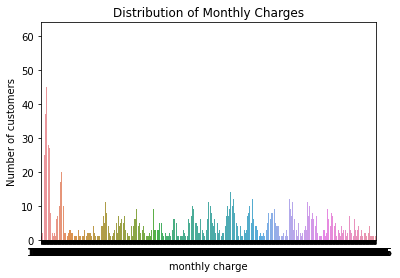

In [34]:
sns.countplot(df['MonthlyCharges'])
plt.title('Distribution of Monthly Charges')
plt.xlabel('monthly charge')
plt.ylabel('Number of customers')
plt.show()

<AxesSubplot:xlabel='MonthlyCharges'>

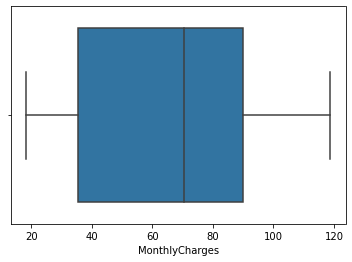

In [35]:
sns.boxplot(df['MonthlyCharges'])

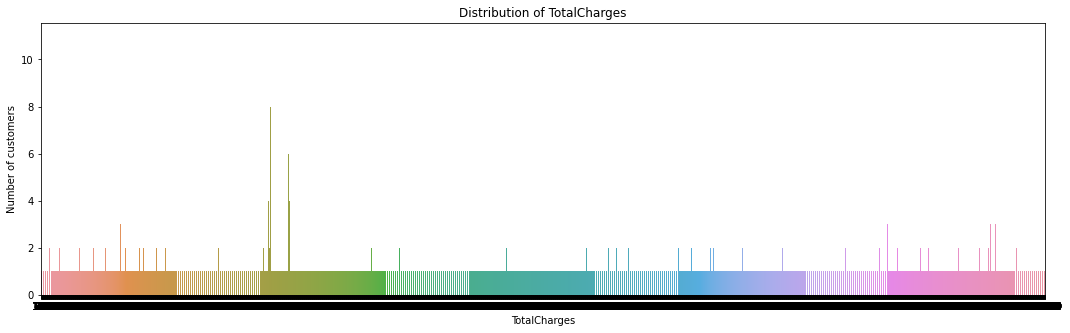

In [36]:
plt.figure(figsize=(18, 5))
sns.countplot(df['TotalCharges'])
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Number of customers')
plt.show()

<AxesSubplot:xlabel='TotalCharges'>

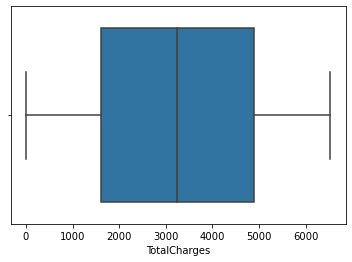

In [37]:
sns.boxplot(df['TotalCharges'])

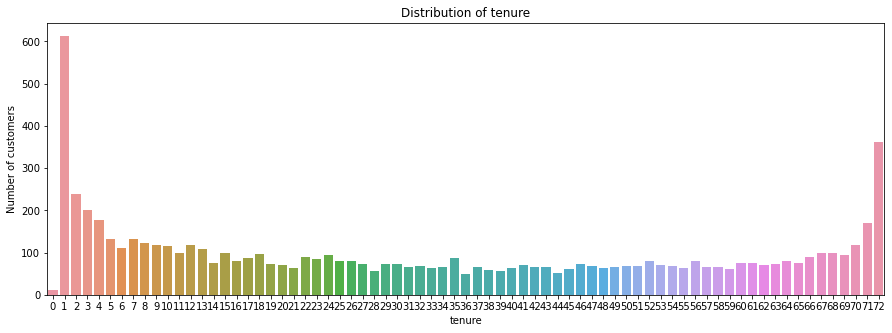

In [38]:
plt.figure(figsize=(15, 5))
sns.countplot(df['tenure'])
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.show()

In [39]:
#maximum no. of customers have one month tenure and then the customers having 72 onths tenure are second largest in numbers

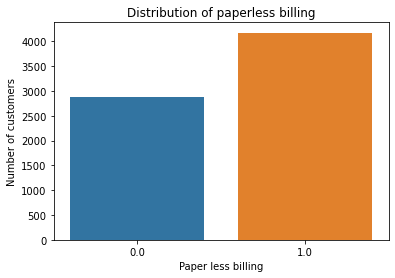

In [40]:
sns.countplot(df['PaperlessBilling'])
plt.title('Distribution of paperless billing')
plt.xlabel('Paper less billing')
plt.ylabel('Number of customers')
plt.show()

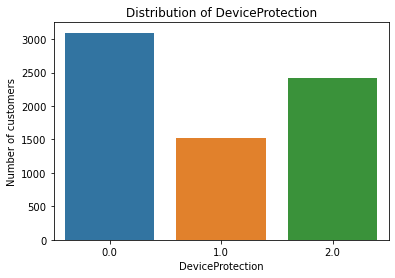

In [41]:
sns.countplot(df['DeviceProtection'])
plt.title('Distribution of DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Number of customers')
plt.show()

In [42]:
#maximum no. of customers dont have device protection .and those who have device protection are half in no. as compared to which dont have

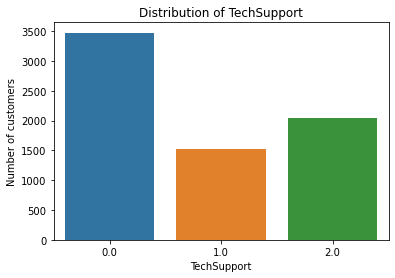

In [43]:
sns.countplot(df['TechSupport'])
plt.title('Distribution of TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Number of customers')
plt.show()

In [44]:
#around 1500 people have technical support and 3500 people dont have  technical support

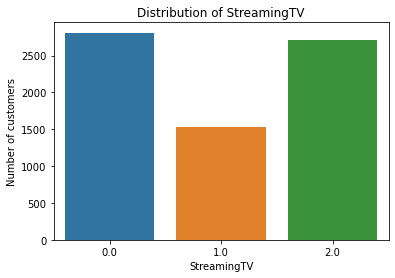

In [45]:
sns.countplot(df['StreamingTV'])
plt.title('Distribution of StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Number of customers')
plt.show()

In [46]:
#around 2500 customers do not stream tv and nearly 1500 customers stream tv

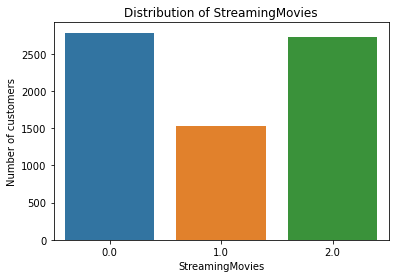

In [47]:
sns.countplot(df['StreamingMovies'])
plt.title('Distribution of StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Number of customers')
plt.show()

In [48]:
#around 2700 customers do not stream movies....and nearly 1500 customers stream movies

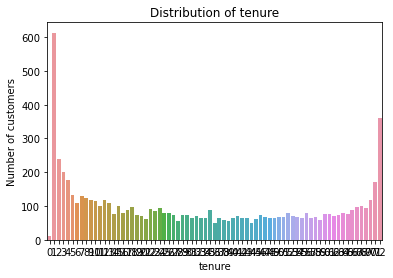

In [49]:
sns.countplot(df['tenure'])
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.show()

<AxesSubplot:xlabel='tenure'>

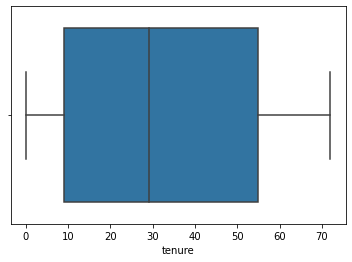

In [50]:
sns.boxplot(df['tenure'])

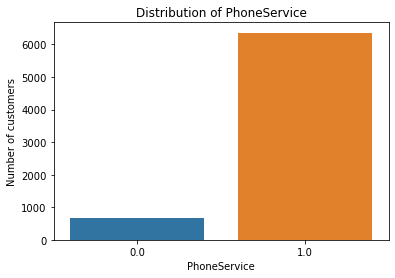

In [51]:
sns.countplot(df['PhoneService'])
plt.title('Distribution of PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Number of customers')
plt.show()

In [52]:
#almost 90% customers have phone service

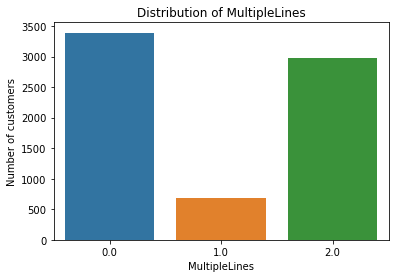

In [53]:
sns.countplot(df['MultipleLines'])
plt.title('Distribution of MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Number of customers')
plt.show()

In [54]:
#nearly 15% of customers  have multiple telephone lines

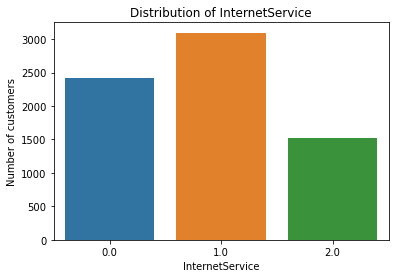

In [55]:
sns.countplot(df['InternetService'])
plt.title('Distribution of InternetService')
plt.xlabel('InternetService')
plt.ylabel('Number of customers')
plt.show()

In [56]:
#nearly 3000 customers have internet service

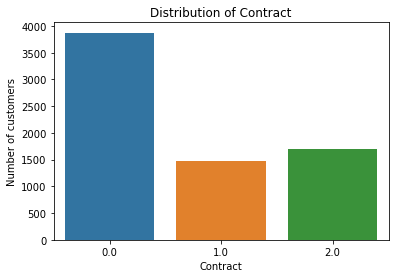

In [57]:
sns.countplot(df['Contract'])
plt.title('Distribution of Contract')
plt.xlabel('Contract')
plt.ylabel('Number of customers')
plt.show()

In [58]:
#almost 1500 customers are on contarct

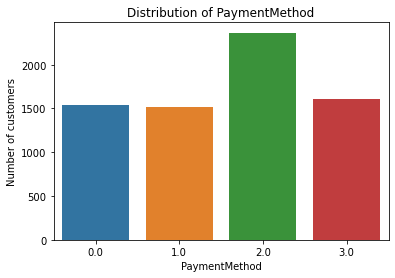

In [59]:
sns.countplot(df['PaymentMethod'])
plt.title('Distribution of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Number of customers')
plt.show()

In [60]:
#maximum customers pay electronically

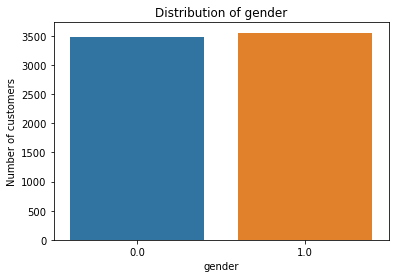

In [61]:
sns.countplot(df['gender'])
plt.title('Distribution of gender')
plt.xlabel('gender')
plt.ylabel('Number of customers')
plt.show()

In [62]:
#their is equal no of male and female customers

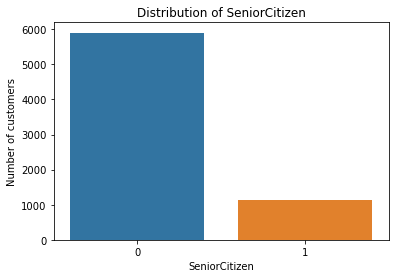

In [63]:
sns.countplot(df['SeniorCitizen'])
plt.title('Distribution of SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Number of customers')
plt.show()

In [64]:
#very few customers are senior citizen

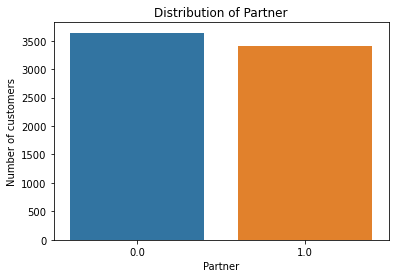

In [65]:
sns.countplot(df['Partner'])
plt.title('Distribution of Partner')
plt.xlabel('Partner')
plt.ylabel('Number of customers')
plt.show()

In [66]:
#almost equal no. of customers are there who had partners or not

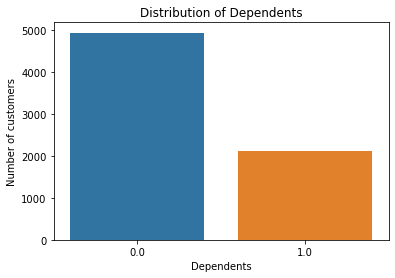

In [67]:
sns.countplot(df['Dependents'])
plt.title('Distribution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of customers')
plt.show()

In [68]:
#nearly 2000 customers have dependents

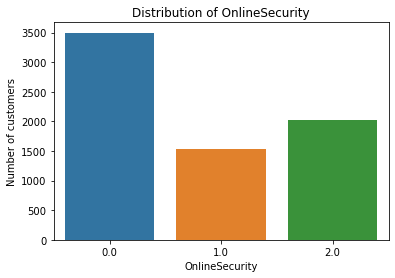

In [69]:
sns.countplot(df['OnlineSecurity'])
plt.title('Distribution of OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Number of customers')
plt.show()

In [70]:
#nearly 1500 customers use online security

In [71]:
#dropping target column and unwanted columns:
X = df.drop(columns=['customerID','Churn'])
y = df['Churn']

In [72]:
#Data scaling Z=(X-mean)/std:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [73]:
X_scaled.shape[1]

19

In [74]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    73.46 %
1    26.54 %
Name: Churn, dtype: object

In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [76]:
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [77]:
RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [78]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Churn, dtype: object

In [79]:
#now train and test split  and training and fitting test model at random state 0 so that we can find best random state:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    y_pred= reg.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.7573085286301039
At random state0,the testing accuracy is:-0.759903381642512


At random state1,the training accuracy is:-0.7631070306837401
At random state1,the testing accuracy is:-0.7574879227053141


At random state2,the training accuracy is:-0.757912539260691
At random state2,the testing accuracy is:-0.7690821256038647


At random state3,the training accuracy is:-0.7626238221792704
At random state3,the testing accuracy is:-0.7521739130434782


At random state4,the training accuracy is:-0.7598453732785697
At random state4,the testing accuracy is:-0.7623188405797101


At random state5,the training accuracy is:-0.7586373520173955
At random state5,the testing accuracy is:-0.7690821256038647


At random state6,the training accuracy is:-0.7629862285576227
At random state6,the testing accuracy is:-0.7613526570048309


At random state7,the training accuracy is:-0.7615366030442136
At random state7,the testing accuracy is:-0.7570048309178744


At

In [80]:
#so as we can interpret random state 8 is giving best train and test accuracy,so we train our model at random state 8:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
X_train.shape

(5634, 19)

In [82]:
y_train.shape

(5634,)

In [83]:
X_test.shape

(1409, 19)

In [84]:
y_test.shape

(1409,)

In [85]:
#now fitting our data to Machine learning models :

reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred= reg.predict(X_test)   
reg.score(X_train,y_train)
reg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',reg_score*100)

regscore=cross_val_score(reg,X,y,cv=5)
lr=regscore.mean()
print('cross val score:',lr*100)
print(classification_report(y_test,y_pred))

accuracy score: 81.47622427253371
cross val score: 79.95184165107425
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [86]:
svm= SVC()  
svm.fit(X_train, y_train)  
svm.score(X_train,y_train)
y_pred=svm.predict(X_test)
svm_score=accuracy_score(y_test,y_pred)
print('accuracy score:',svm_score*100)

svmscore=cross_val_score(svm,X,y,cv=5)
sv=svmscore.mean()
print('cross val score:',sv*100)
print(classification_report(y_test,y_pred))

accuracy score: 73.52732434350602
cross val score: 73.46301575908123
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



In [87]:
knc= KNeighborsClassifier()  
knc.fit(X_train, y_train)  
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)
print(classification_report(y_test,y_pred))

accuracy score: 75.7984386089425
cross val score: 74.72663558939287
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1036
           1       0.56      0.42      0.48       373

    accuracy                           0.76      1409
   macro avg       0.68      0.65      0.66      1409
weighted avg       0.74      0.76      0.75      1409



In [88]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)
print(classification_report(y_test,y_pred))

accuracy score: 72.03690560681333
cross val score: 72.6535179689012
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [89]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)
print(classification_report(y_test,y_pred))

accuracy score: 79.91483321504613
cross val score: 79.2277324343506
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [91]:
#so according to dataset  LogisticRegression is getting best accuracy of 81%
#we will go ahead with logistic
#now we do gridsearcv hyperparametertuning on this algorithm

grid_parameters ={ 'dual':[False], 'tol':[0.0001], 'C':[1.0], 'fit_intercept':[True],
                  'intercept_scaling':[1], 
                  'max_iter':[100], 'verbose':[0], 'warm_start':[False]}
clf=GridSearchCV(reg,grid_parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'C': 1.0, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [92]:
reg=LogisticRegression(C=1.0,dual=False,fit_intercept= True, intercept_scaling=1, max_iter=100, tol= 0.0001, verbose= 0, warm_start= False)
reg.fit(X_train,y_train)
reg.score(X_train,y_train)
y_pred=reg.predict(X_test)
regs=accuracy_score(y_test,y_pred)
print('accuracy score:',regs*100)

regscore=cross_val_score(reg,X,y,cv=5)
regc=regscore.mean()
print('cross val score:',regc*100)

accuracy score: 81.47622427253371
cross val score: 79.95184165107425


In [93]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8147622427253371

In [94]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[938,  98],
       [163, 210]], dtype=int64)

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



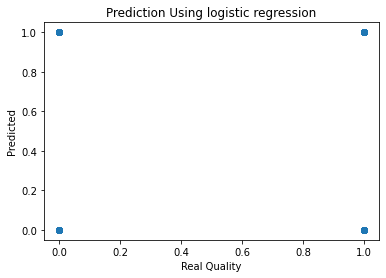

In [96]:
plt.scatter(y_test,y_pred)
plt.title("Prediction Using logistic regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [97]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [98]:
clf.best_estimator_

LogisticRegression()

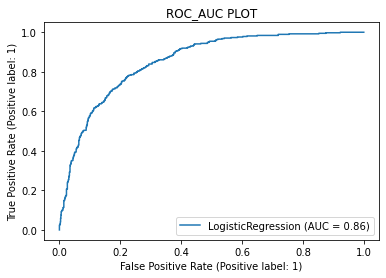

In [99]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,X_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()   

In [102]:
#CONCLUSION
#In this project, we build various models like logistic regression, knn classifier, support vector classifier,
#decision tree classifier, random forest classifier.

#A hyperparameter tuned logistic regression gives the highest accuracy score of 81% and cross val score of 79%.and f1 score of 88%
#and auc value 0.86
#saving the model to local file system

In [103]:
filename='churn analysis_model.pickle'
pickle.dump(reg,open(filename,'wb'))